In [1]:
#Lendo os dataframes
import pandas as pd
path = 'C:\\Users\\User\\Dropbox (CPI)\\EduardoMinsky\\Dados_Mineracao\\Dados Tabulares\\Dados_Relacionados\\'
#Pegando processos apenas do Pará
mun = pd.read_csv(path+'ProcessoMunicipio.csv')
substancia = pd.read_csv(path+'ProcessoSubstancia.csv')
eventos = pd.read_csv(path+'ProcessoEvento.csv')
processos = pd.read_csv(path+'Processo.csv')
pessoa = pd.read_csv(path+'ProcessoPessoa.csv')

## Analisando para o evento 333

C:\Users\User\AppData\Local\Temp\ipykernel_20856\2818150771.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eventos333_ativos_ouro['Data'] = pd.to_datetime(eventos333_ativos_ouro.DTEvento).dt.year
C:\Users\User\AppData\Local\Temp\ipykernel_20856\2818150771.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eventos333_ativos_ouro.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_20856\2818150771.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

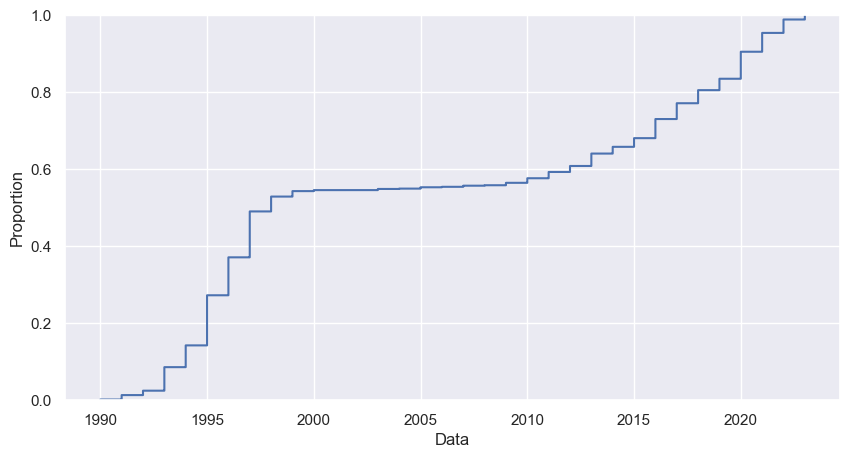

In [2]:
#Criando analises para evento 333
import seaborn as sns
import  matplotlib.pyplot as plt
sns.set(rc={"figure.figsize":(10, 5)})

#Pegando para ouro
ouro = substancia.query('Substancia.str.contains("OURO")',engine = 'python')
#Pegando eventos 333,1402,513
eventos333 = eventos.query('IDEvento == 333')
#Filtrando os processos ativos:
prceossos_ativos = processos.query('BTAtivo=="S"')
#Relacionando os processos ativos com o df 333
eventos333_ativos = eventos333[eventos333['DSProcesso'].isin(prceossos_ativos['DSProcesso'])]
#Relacionando Ouro com os processos de evento 333
eventos333_ativos_ouro = eventos333_ativos[eventos333_ativos['DSProcesso'].isin(ouro['DSProcesso'])]
#Transformando o campo de data do evento333 em datetime
eventos333_ativos_ouro['Data'] = pd.to_datetime(eventos333_ativos_ouro.DTEvento).dt.year
#Tirando registros duplicados
eventos333_ativos_ouro.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)
#Plotando
#sns.histplot(eventos333_ativos_ouro.query('Data >2012')['Data'], stat='count', alpha=.4,bins=100)
sns.ecdfplot(eventos333_ativos_ouro['Data'], stat='proportion')


#Pegando os estados para esses processo ativos de ouro
mun_ouro_ativo_333 = mun[mun['DSProcesso'].isin(eventos333_ativos_ouro['DSProcesso'])]
#Agrupando os estados por Regiao (Norte, sul, Sudeste,CentroOeste, Nordeste)
sul =['RS','SC','PR']
sudeste = ['SP','MG','RJ','ES']
centrooeste =['MS','MT','GO','DF']
nordeste = ['BA','PI','MA','CE','RN','PB','PE','AL','SE']
norte = ['AC','RO','AM','RR','PA','TO','AP']
mun_ouro_ativo_333['Regiao'] = ['Sul' if x in sul else 'Sudeste' if x in sudeste else 'Centro_Oeste' if x in centrooeste else 'Nordeste' if x in nordeste else 'Norte' if x in norte else 'SemEstado' for x in mun_ouro_ativo_333['UF']]
#Dando Join com o df eventos333_ativos_ouro para plotar o ano com regiao do brasil
join_333_regiao = eventos333_ativos_ouro.merge(mun_ouro_ativo_333,on='DSProcesso',how='inner')
join_333_regiao.drop_duplicates(subset='DSProcesso' ,keep ='last',inplace=True)
#Plotando quebrando por regiao
#sns.histplot(data=join_333_regiao, x="Data", hue="Regiao", stat='count', alpha=.4, multiple='dodge')
#sns.ecdfplot(data=join_333_regiao, x="Data", hue="Regiao", stat='count')



In [258]:
join_333_regiao.query('Regiao=="Norte"')['Data'].value_counts().sum()

14860

## QUEBRANDO POR REGIAO para o Evento 333

<AxesSubplot:xlabel='Data', ylabel='Count'>

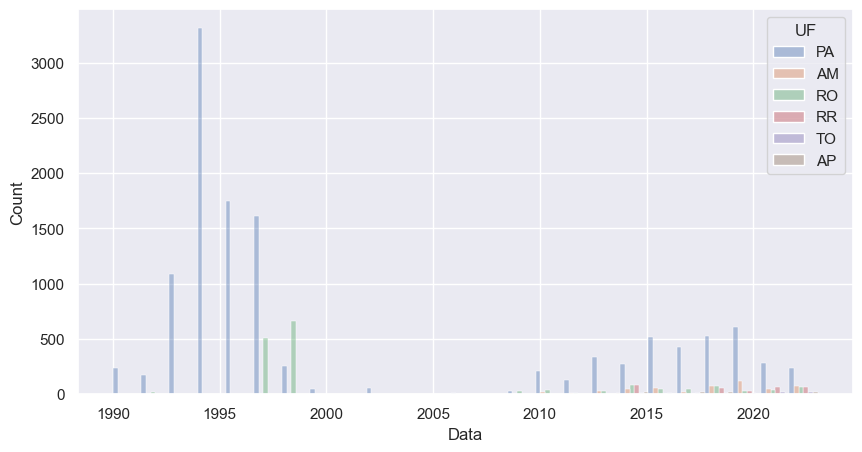

In [250]:

sns.histplot(data=join_333_regiao.query('Regiao=="Norte"'), x="Data", hue="UF", stat='count', alpha=.4, multiple='dodge',bins=25)

#sns.ecdfplot(data=join_333_regiao.query('Regiao=="Centro_Oeste"'), x="Data", hue="UF", stat='count')